## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

### Testing data retrieval

In [218]:
import psycopg2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:

def execute_query(query_string, return_pandas=True, limit=50):
    """
    Create a function to execute queries.
    limit  (int): Maximum number of rows to return. Default is 50.
    """
    con = psycopg2.connect(database='mid_term_project', user='lhl_student', password='lhl_student',
        host='lhl-data-bootcamp.crzjul5qln0e.ca-central-1.rds.amazonaws.com', port='5432')
    cur = con.cursor()

    if limit:
        query_string+=' LIMIT '+str(limit)
        print(query_string)
    if return_pandas:
        response = pd.read_sql_query(query_string, con)
    else:
        cur.execute(query_string)
        response = cur.fetchall()
    con.close()
    return response


# Let's try out our function to make sure it does
# the same as what we have above

# query = """
# SELECT fl_date, flights FROM  flights LIMIT 1
# """
# execute_query(query)

In [17]:
query = """
SELECT * FROM  flights
"""
flight1 = execute_query(query,limit=10)
flight1.head()



SELECT * FROM  flights
 LIMIT 10


C:\Users\silvh\AppData\Local\Temp\ipykernel_7328\1330879112.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  response = pd.read_sql_query(query_string, con)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-11-11,AS,AS,AS,1907,AS,N363VA,1907,12889,LAS,...,414.0,None,None,None,None,None,None,None,None,None
1,2019-11-11,AS,AS,AS,1908,AS,N523VA,1908,14771,SFO,...,414.0,None,None,None,None,None,None,None,None,None
2,2019-11-11,AS,AS,AS,1909,AS,N285VA,1909,12889,LAS,...,414.0,None,None,None,None,None,None,None,None,None
3,2019-11-11,AS,AS,AS,1911,AS,N364VA,1911,12889,LAS,...,414.0,None,None,None,None,None,None,None,None,None
4,2019-11-11,AS,AS,AS,1912,AS,N637VA,1912,14747,SEA,...,1024.0,None,None,None,None,None,None,None,None,None


In [5]:
flight_columns = flight1.columns.to_list()
flight_columns

['fl_date',
 'mkt_unique_carrier',
 'branded_code_share',
 'mkt_carrier',
 'mkt_carrier_fl_num',
 'op_unique_carrier',
 'tail_num',
 'op_carrier_fl_num',
 'origin_airport_id',
 'origin',
 'origin_city_name',
 'dest_airport_id',
 'dest',
 'dest_city_name',
 'crs_dep_time',
 'dep_time',
 'dep_delay',
 'taxi_out',
 'wheels_off',
 'wheels_on',
 'taxi_in',
 'crs_arr_time',
 'arr_time',
 'arr_delay',
 'cancelled',
 'cancellation_code',
 'diverted',
 'dup',
 'crs_elapsed_time',
 'actual_elapsed_time',
 'air_time',
 'flights',
 'distance',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay',
 'first_dep_time',
 'total_add_gtime',
 'longest_add_gtime',
 'no_name']

In [6]:
query = """
SELECT * FROM  passengers
"""
passengers = execute_query(query,limit=5)


SELECT * FROM  passengers
 LIMIT 5


C:\Users\silvh\AppData\Local\Temp\ipykernel_7328\1330879112.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  response = pd.read_sql_query(query_string, con)


In [8]:
passengers_columns = passengers.columns.to_list()
passengers_columns

['departures_scheduled',
 'departures_performed',
 'payload',
 'seats',
 'passengers',
 'freight',
 'mail',
 'distance',
 'ramp_to_ramp',
 'air_time',
 'unique_carrier',
 'airline_id',
 'unique_carrier_name',
 'region',
 'carrier',
 'carrier_name',
 'carrier_group',
 'carrier_group_new',
 'origin_airport_id',
 'origin_city_market_id',
 'origin',
 'origin_city_name',
 'origin_country',
 'origin_country_name',
 'dest_airport_id',
 'dest_city_market_id',
 'dest',
 'dest_city_name',
 'dest_country',
 'dest_country_name',
 'aircraft_group',
 'aircraft_type',
 'aircraft_config',
 'year',
 'month',
 'distance_group',
 'class',
 'data_source']

In [43]:
query = """
SELECT * FROM fuel_comsumption
"""
fuel = execute_query(query,limit=10)
fuel_columns = fuel.columns.to_list()
fuel_columns


SELECT * FROM fuel_comsumption
 LIMIT 10


C:\Users\silvh\AppData\Local\Temp\ipykernel_7328\1330879112.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  response = pd.read_sql_query(query_string, con)


['month',
 'airline_id',
 'unique_carrier',
 'carrier',
 'carrier_name',
 'carrier_group_new',
 'sdomt_gallons',
 'satl_gallons',
 'spac_gallons',
 'slat_gallons',
 'sint_gallons',
 'ts_gallons',
 'tdomt_gallons',
 'tint_gallons',
 'total_gallons',
 'sdomt_cost',
 'satl_cost',
 'spac_cost',
 'slat_cost',
 'sint_cost',
 'ts_cost',
 'tdomt_cost',
 'tint_cost',
 'total_cost',
 'year']

In [1]:
# Retrieve test data
query = """
SELECT * FROM flights_test
"""
TEST = execute_query(query,limit=None)


In [260]:
fuel

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5100.0,0.0,5100.0,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405.0,0.0,0.0,0.0,0.0,522405.0,569497.0,0.0,569497.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,12,20377.0,X9,X9,Omni Air International LLC,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1584314.0,4588387.0,6172701.0,2018
3031,12,20207.0,XP,XP,XTRA Airways,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
3032,12,20378.0,YV,YV,Mesa Airlines Inc.,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
3033,12,20452.0,YX,YX,Republic Airline,2,21048.0,0.0,0.0,0.0,...,50043.0,0.0,0.0,0.0,0.0,50043.0,50043.0,0.0,50043.0,2018


### Find the common columns between tables

In [13]:
flights_passengers_columns = set(flight_columns) & set(passengers_columns)
flights_passengers_columns

{'air_time',
 'dest',
 'dest_airport_id',
 'dest_city_name',
 'distance',
 'origin',
 'origin_airport_id',
 'origin_city_name'}

In [37]:
passengers_fuel_columns = set(passengers_columns) & set(fuel_columns)
passengers_fuel_columns

{'airline_id',
 'carrier',
 'carrier_group_new',
 'carrier_name',
 'month',
 'unique_carrier',
 'year'}

In [14]:
flights_fuel_columns = set(flight_columns) & set(fuel_columns)
flights_fuel_columns 

set()

In [38]:
common_columns = set(flight_columns) & set(passengers_columns) & set(fuel_columns)
common_columns

set()

### See if there are other keys on which to join tables

In [19]:
flight1.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-11-11,AS,AS,AS,1907,AS,N363VA,1907,12889,LAS,...,414.0,None,None,None,None,None,None,None,None,None
1,2019-11-11,AS,AS,AS,1908,AS,N523VA,1908,14771,SFO,...,414.0,None,None,None,None,None,None,None,None,None
2,2019-11-11,AS,AS,AS,1909,AS,N285VA,1909,12889,LAS,...,414.0,None,None,None,None,None,None,None,None,None
3,2019-11-11,AS,AS,AS,1911,AS,N364VA,1911,12889,LAS,...,414.0,None,None,None,None,None,None,None,None,None
4,2019-11-11,AS,AS,AS,1912,AS,N637VA,1912,14747,SEA,...,1024.0,None,None,None,None,None,None,None,None,None


In [39]:
flight1['fl_date'].dtype

dtype('O')

In [33]:
passengers.loc[:,passengers.columns.str.contains('carrier')]

,unique_carrier,unique_carrier_name,carrier,carrier_name,carrier_group,carrier_group_new
0,8V,Wright Air Service,8V,Wright Air Service,1,5
1,8V,Wright Air Service,8V,Wright Air Service,1,5
2,8V,Wright Air Service,8V,Wright Air Service,1,5
3,8V,Wright Air Service,8V,Wright Air Service,1,5
4,8V,Wright Air Service,8V,Wright Air Service,1,5


In [36]:
flight1.loc[:,flight1.columns.str.contains('carrier')]

,mkt_unique_carrier,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,op_carrier_fl_num,carrier_delay
0,AS,AS,1907,AS,1907,None
1,AS,AS,1908,AS,1908,None
2,AS,AS,1909,AS,1909,None
3,AS,AS,1911,AS,1911,None
4,AS,AS,1912,AS,1912,None
5,AS,AS,1915,AS,1915,None
6,AS,AS,1916,AS,1916,None
7,AS,AS,1917,AS,1917,None
8,AS,AS,1920,AS,1920,None
9,AS,AS,1925,AS,1925,None


### Load the sample data

In [47]:
selected_flights_columns = [
    'fl_date',
    'branded_code_share',
    'op_unique_carrier',
    'tail_num',
    'op_carrier_fl_num',
    'origin_airport_id',
    'origin_city_name',
    'dest_airport_id',
    'dest_city_name',
    'crs_dep_time',
    'dep_time',
    'dep_delay',
    'taxi_out',
    'wheels_off',
    'wheels_on',
    'taxi_in',
    'crs_arr_time',
    'arr_time',
    'arr_delay',
    'cancelled',
    'cancellation_code',
    'diverted',
    'dup',
    'crs_elapsed_time',
    'actual_elapsed_time',
    'air_time',
    'flights',
    'distance',
    'carrier_delay',
    'weather_delay',
    'nas_delay',
    'security_delay',
    'late_aircraft_delay',
    'first_dep_time',
    'total_add_gtime',
    'longest_add_gtime',
    'no_name'
]

In [9]:
# query = f"""
# SELECT {selected_flights_columns} FROM  flights
# """
# # flights_sample = execute_query(query,limit=10)
# print(query)


In [3]:
flights = pd.read_csv('../data/raw/flights_raw.csv')
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-08-27,UA,UA_CODESHARE,UA,4900,C5,N16147,4900,11618,EWR,...,212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-02-25,NK,NK,NK,892,NK,N665NK,892,13204,MCO,...,957.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-05-06,DL,DL,DL,2023,DL,N893AT,2023,12217,HSV,...,151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-09-24,WN,WN,WN,1995,WN,N725SW,1995,14747,SEA,...,1024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-23,HA,HA,HA,346,HA,N483HA,346,12173,HNL,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
fuel = pd.read_csv('../data/raw/fuel_raw.csv')
fuel

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5100.0,0.0,5100.0,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405.0,0.0,0.0,0.0,0.0,522405.0,569497.0,0.0,569497.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,12,20377.0,X9,X9,Omni Air International LLC,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1584314.0,4588387.0,6172701.0,2018
3031,12,20207.0,XP,XP,XTRA Airways,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
3032,12,20378.0,YV,YV,Mesa Airlines Inc.,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
3033,12,20452.0,YX,YX,Republic Airline,2,21048.0,0.0,0.0,0.0,...,50043.0,0.0,0.0,0.0,0.0,50043.0,50043.0,0.0,50043.0,2018


In [5]:
passengers = pd.read_csv('../data/raw/passengers_raw.csv')
passengers.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,2.0,2.0,45500.0,152.0,144.0,0.0,0.0,333.0,172.0,99.0,...,CA,Canada,6,638,1,2017,9,1,F,IU
1,76.0,75.0,450000.0,600.0,416.0,0.0,0.0,364.0,7494.0,6408.0,...,US,United States,4,479,1,2016,11,1,F,DU
2,6.0,6.0,825148.0,0.0,0.0,315001.0,0.0,1854.0,1409.0,1253.0,...,US,United States,7,730,2,2015,10,4,G,DU
3,0.0,1.0,42500.0,173.0,52.0,0.0,0.0,638.0,95.0,83.0,...,US,United States,6,614,1,2016,1,2,L,DU
4,28.0,28.0,1215200.0,4900.0,3796.0,2216.0,0.0,251.0,1643.0,1227.0,...,US,United States,6,614,1,2018,8,1,F,DU


### Assigned tasks

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [6]:
flights.loc[:,flights.columns.str.contains('delay')]


,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,-2.0,-13.0,NaN,NaN,NaN,NaN,NaN
1,-5.0,-23.0,NaN,NaN,NaN,NaN,NaN
2,-6.0,-10.0,NaN,NaN,NaN,NaN,NaN
3,4.0,-24.0,NaN,NaN,NaN,NaN,NaN
4,-5.0,-6.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9995,-14.0,-23.0,NaN,NaN,NaN,NaN,NaN
9996,-5.0,-13.0,NaN,NaN,NaN,NaN,NaN
9997,-3.0,-15.0,NaN,NaN,NaN,NaN,NaN
9998,27.0,14.0,NaN,NaN,NaN,NaN,NaN


In [7]:
# delayed_flights = flights['dep_delay']
flights.loc[:,flights.columns.str.contains('delay')].describe()
# 

,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,9860.000000,9837.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000
mean,10.841176,5.599776,20.584189,3.540554,14.918378,0.055441,27.089836
std,46.507355,48.246246,61.339923,33.682784,32.145599,1.305831,48.998859
min,-29.000000,-59.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.000000,-6.000000,0.000000,0.000000,2.000000,0.000000,4.000000
75%,7.000000,8.000000,17.000000,0.000000,18.250000,0.000000,35.000000
max,1170.000000,1164.000000,1164.000000,974.000000,452.000000,48.000000,537.000000


(array([9.232e+03, 4.930e+02, 8.700e+01, 7.000e+00, 9.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([ -59. ,   63.3,  185.6,  307.9,  430.2,  552.5,  674.8,  797.1,
         919.4, 1041.7, 1164. ]),
 <BarContainer object of 10 artists>)

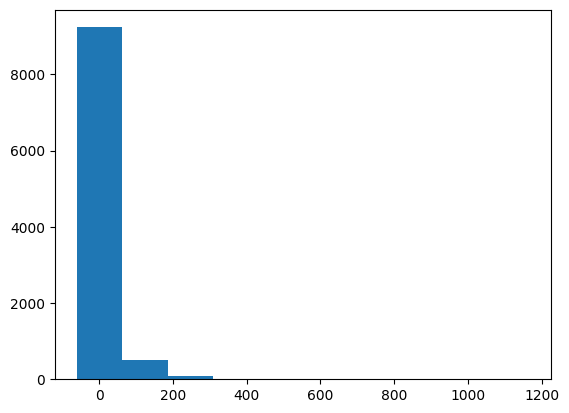

In [8]:
plt.hist(flights['arr_delay'])

In [9]:
print(st.normaltest(flights['arr_delay']))

NormaltestResult(statistic=nan, pvalue=nan)


In [10]:
print(st.shapiro(flights['arr_delay']))

ShapiroResult(statistic=nan, pvalue=1.0)


C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [11]:
# Unable to perform statistical tests with raw values.
# Data is not normally distributed and there are extreme outliers

dep_delay_outliers_filter = (flights['arr_delay'] > flights['arr_delay'].mean() -3 * flights['arr_delay'].std()) & (flights['arr_delay'] < flights['arr_delay'].mean() +3 * flights['arr_delay'].std())
flights_outliers_removed = flights[dep_delay_outliers_filter]


Text(0.5, 1.0, 'outliers removed')

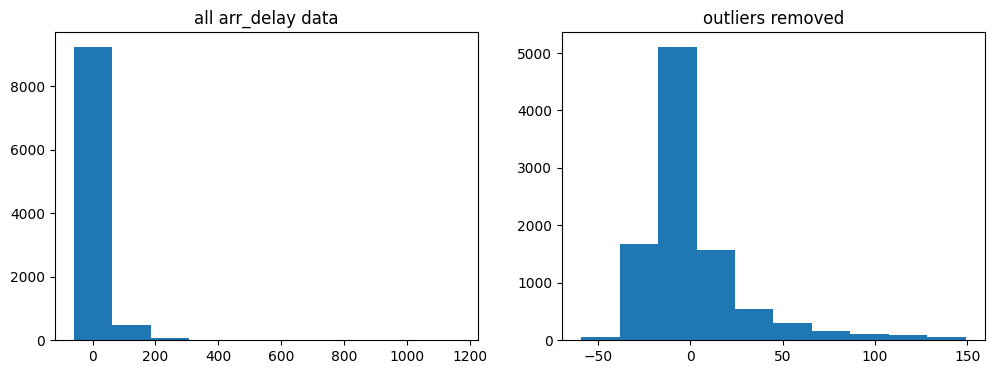

In [12]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,4))
ax[0].hist(flights['arr_delay'],bins=10)
ax[0].set_title('all arr_delay data')
ax[1].hist(flights_outliers_removed['arr_delay'],bins=10)
ax[1].set_title('outliers removed')
# plt.xlim(flights['arr_delay'].min(),flights['arr_delay'].max())

# ax[0].hist(flights['arr_delay'],bins=10)
# ax[0].set_title('all arr_delay data')
# ax[1].hist(flights_outliers_removed['arr_delay'],bins=10)
# ax[1].set_title('outliers removed')
# plt.xlim(flights['arr_delay'].min(),flights['arr_delay'].max())

In [13]:
print(st.normaltest(flights_outliers_removed['arr_delay']))
# Target variable is not from a normal distribution

NormaltestResult(statistic=4476.145750895938, pvalue=0.0)


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [14]:
# Convert dates
# from datetime import datetime
def date_columns(df,date_column='fl_date',format='%Y-%m-%d'):
    """
    
    Take the dates in a dateframes to create new columns:
        _date_standard: Datetime data 
        _year
        _month
    Parmaters:
    - df: Dataframe.
    - date_column: Name of the column containing the date strings.
    - Format: Original date format in the dateframe. Default: '%d.%m.%Y'
    
    Make sure to do the following import: 
    from datetime import datetime
    """
    date_column=str(date_column)
    
    # df[str(date_column+'_year')] = pd.to_datetime(df[date_column],
    #     format='%d.%m.%Y')
    date = pd.to_datetime(df[date_column],
        format=format)
    # df.get(str(date_column+'_standard'),date)
    # df.get(str(date_column+'_year'),date.dt.year)
    # df.get(str(date_column+'_month'),date.dt.month)
    df[str(date_column+'_standard')] = date
    df[str(date_column+'_year')] = date.dt.year
    df[str(date_column+'_month')] = date.dt.month
    return df


In [15]:
date_columns(flights_outliers_removed,date_column='fl_date')
flights_outliers_removed

C:\Users\silvh\AppData\Local\Temp\ipykernel_6048\48635832.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(date_column+'_standard')] = date
C:\Users\silvh\AppData\Local\Temp\ipykernel_6048\48635832.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(date_column+'_year')] = date.dt.year
C:\Users\silvh\AppData\Local\Temp\ipykernel_6048\48635832.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,fl_date_standard,fl_date_year,fl_date_month
0,2018-08-27,UA,UA_CODESHARE,UA,4900,C5,N16147,4900,11618,EWR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-27,2018,8
1,2018-02-25,NK,NK,NK,892,NK,N665NK,892,13204,MCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25,2018,2
2,2019-05-06,DL,DL,DL,2023,DL,N893AT,2023,12217,HSV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-06,2019,5
3,2018-09-24,WN,WN,WN,1995,WN,N725SW,1995,14747,SEA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-24,2018,9
4,2018-01-23,HA,HA,HA,346,HA,N483HA,346,12173,HNL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-23,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2018-09-16,AA,AA_CODESHARE,AA,4912,PT,N609DP,4912,10990,CHO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-16,2018,9
9996,2018-09-01,DL,DL_CODESHARE,DL,3494,9E,N8783E,3494,10397,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-01,2018,9
9997,2019-07-12,WN,WN,WN,2555,WN,N200WN,2555,14869,SLC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-12,2019,7
9998,2019-05-27,AA,AA,AA,2731,AA,N856NN,2731,11057,CLT,...,NaN,NaN,NaN,1318.0,17.0,17.0,NaN,2019-05-27,2019,5


In [16]:
flights_monthly = flights_outliers_removed.groupby('fl_date_month').agg(mean=('arr_delay','mean'),median=('arr_delay','median'))
flights_monthly

,mean,median
fl_date_month,,
1,-0.830667,-8.0
2,2.348529,-6.0
3,-0.931790,-7.0
4,0.063576,-7.0
5,2.129187,-6.0
6,5.461634,-4.0
7,3.533485,-5.0
8,4.237601,-5.0
9,-2.973214,-9.0


Text(0.5, 1.0, 'median arr_delay')

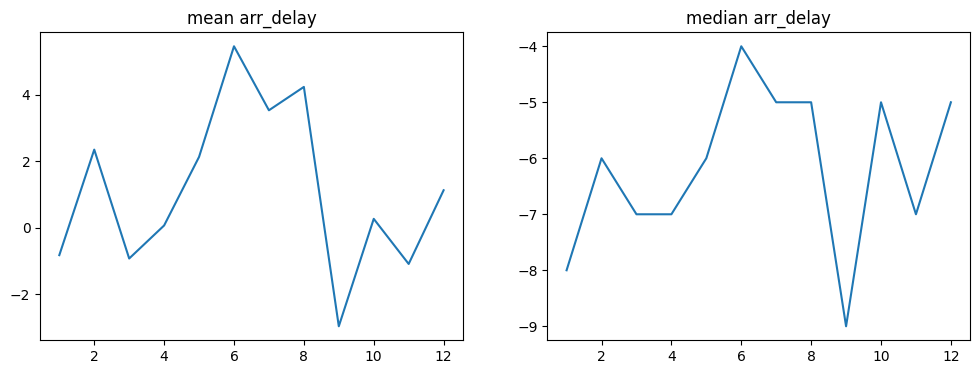

In [17]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,4))
ax[0].plot(flights_monthly['mean'])
ax[0].set_title('mean arr_delay') 
ax[1].plot(flights_monthly['median'])
ax[1].set_title('median arr_delay')

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

<AxesSubplot: xlabel='arr_time', ylabel='taxi_in'>

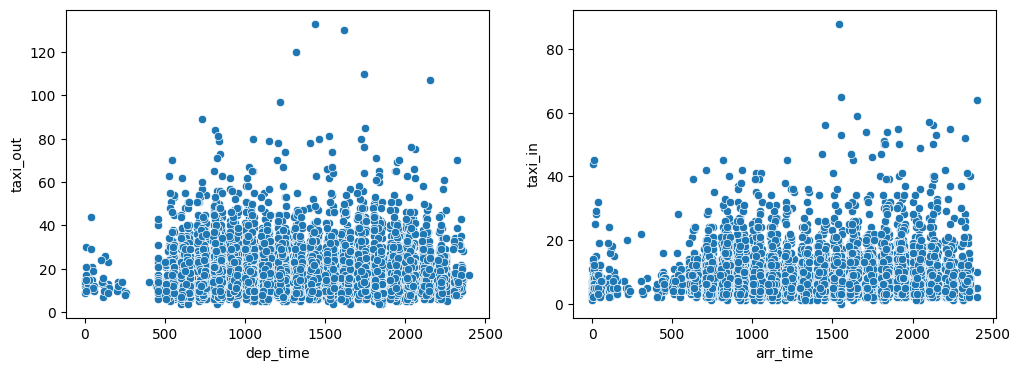

In [18]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,4))
sns.scatterplot(data=flights_outliers_removed, x='dep_time',y='taxi_out', ax=ax[0])
sns.scatterplot(data=flights_outliers_removed, x='arr_time',y='taxi_in', ax=ax[1])

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

Text(0.5, 0.98, 'Data for flights with arr_delay > 0.')

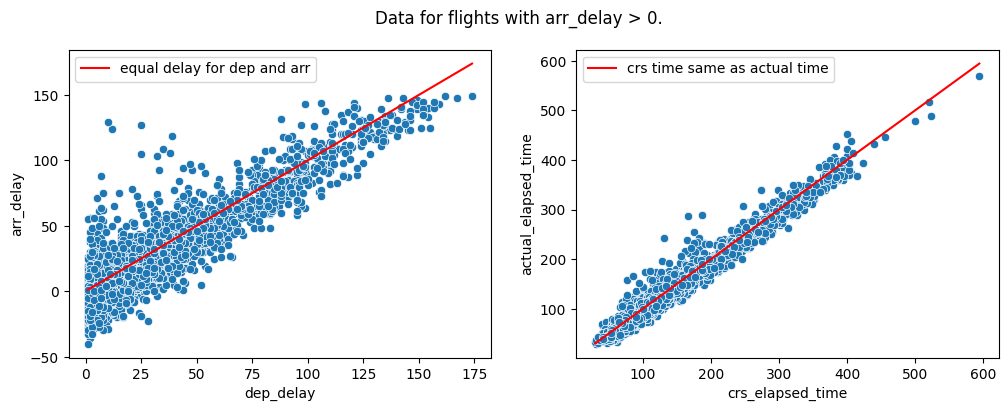

In [19]:

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,4))
sns.scatterplot(data=flights_outliers_removed[flights_outliers_removed['dep_delay']>0], x='dep_delay',y='arr_delay', ax=ax[0])
sns.lineplot(data=flights_outliers_removed[flights_outliers_removed['dep_delay']>0],x='dep_delay',y='dep_delay', ax=ax[0],c='red', label='equal delay for dep and arr')
sns.scatterplot(data=flights_outliers_removed[flights_outliers_removed['dep_delay']>0], x='crs_elapsed_time',y= 'actual_elapsed_time', ax=ax[1])
sns.lineplot(data=flights_outliers_removed[flights_outliers_removed['dep_delay']>0],x='crs_elapsed_time',y='crs_elapsed_time', ax=ax[1],c='red', label='crs time same as actual time')

fig.suptitle('Data for flights with arr_delay > 0.')

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

##### *Silvia: Trying to figure out how to join data from different tables*

In [20]:
# unique op_unique_carrier values in flights table
print(len(flights_outliers_removed['op_unique_carrier'].value_counts()),'unique op_unique_carrier values in flights table')
flights_outliers_removed['op_unique_carrier'].value_counts()

28 unique op_unique_carrier values in flights table


WN    1663
DL    1204
AA    1180
OO     964
UA     731
YX     390
B6     376
MQ     361
OH     346
AS     312
9E     290
YV     273
NK     236
EV     209
F9     149
QX     137
G4     120
CP     117
HA     116
ZW     114
PT     111
G7      94
AX      92
C5      56
VX      13
EM      10
KS       3
9K       1
Name: op_unique_carrier, dtype: int64

In [21]:
# unique mkt_carrier values in flights table
print(len(flights_outliers_removed['mkt_carrier'].value_counts()),'unique mkt_carrier values in flights table')
flights_outliers_removed['mkt_carrier'].value_counts()

11 unique mkt_carrier values in flights table


AA    2513
DL    2113
UA    1840
WN    1663
AS     519
B6     376
NK     236
F9     149
HA     126
G4     120
VX      13
Name: mkt_carrier, dtype: int64

In [22]:
# unique mkt_unique_carrier values in flights table
print(len(flights_outliers_removed['mkt_unique_carrier'].value_counts()),'unique mkt_unique_carrier values in flights table')
flights_outliers_removed['mkt_unique_carrier'].value_counts()

11 unique mkt_unique_carrier values in flights table


AA    2513
DL    2113
UA    1840
WN    1663
AS     519
B6     376
NK     236
F9     149
HA     126
G4     120
VX      13
Name: mkt_unique_carrier, dtype: int64

In [23]:
print(len(passengers['unique_carrier'].value_counts()),'unique unique_carrier values in passengers table')
print(passengers['unique_carrier'].value_counts())

281 unique unique_carrier values in passengers table
DL     871
WN     788
UA     776
OO     578
AA     562
      ... 
36Q      1
PP       1
CRV      1
37Q      1
LS       1
Name: unique_carrier, Length: 281, dtype: int64


In [24]:
# Passengers table: Difference between unique_carrier and carrier
unique_carriers_passengers = passengers['unique_carrier'].unique()
carriers = passengers['carrier'].unique()
print(len(unique_carriers_passengers))
print(len(carriers))
set(carriers) - set(unique_carriers_passengers)

281
286


{'0MQ', '16', '17', '1RQ', '21Q', '4EQ', 'FC', 'K8', 'RS'}

In [25]:
print(len(fuel['unique_carrier'].value_counts()),'unique unique_carrier values in fuel table')
print(fuel['unique_carrier'].value_counts())

62 unique unique_carrier values in fuel table
0WQ    57
HA     57
KH     57
KLQ    57
M6     57
       ..
2HQ    21
3EQ    12
0JQ     9
US      6
FCQ     3
Name: unique_carrier, Length: 62, dtype: int64


In [26]:
# Create a function
def compare_id(df1, df1_column, df2, df2_column,print_common=False,print_difference=True):
    """
    Print the number of common values and unique values between two dataframe columns.
    
    """
    df1_values = df1[df1_column].unique()
    df2_values = df2[df2_column].unique()
    common_values = set(df1_values) & set(df2_values)
    if len(df1_values) > len(df2_values):
        different_values = set(df1_values) - set(df2_values)
        print(f'Proper subset = {set(df2_values) < set(df1_values)}')
    else:
        different_values = set(df2_values) - set(df1_values)
        print(f'Proper subset = {set(df1_values) < set(df2_values)}')
    print('Unique values in df1:',len(df1_values))
    print('Unique values in df2:',len(df2_values))
    print('Number of common values between df1 and df2:',len(common_values))
    print('Number of different values between df1 and df2:',len(different_values))
    if print_common == True:
        print('Values in common:',common_values)
    if print_difference == True:
        print('Different values:',different_values)
    

In [27]:
# unique_carriers in passengers vs. fuel table
compare_id(passengers,'unique_carrier',fuel,'unique_carrier')
compare_id(passengers,'unique_carrier',passengers,'carrier')
# print(len(unique_carriers_passengers))
# unique_carrier_fuel = fuel['unique_carrier'].unique()
# print(len(unique_carrier_fuel))
# different_unique_carrier = set(unique_carriers_passengers) - set(unique_carrier_fuel)
# print(len(different_unique_carrier))
# # passengers table has more unique carriers than fuel table

Proper subset = False
Unique values in df1: 281
Unique values in df2: 63
Number of common values between df1 and df2: 61
Number of different values between df1 and df2: 220
Different values: {'KE', 'RU', 'AAT', 'NZ', '02Q', 'XL', 'IFQ', 'JQ', 'QR', 'JJ', '14Q', 'DI', 'AV', 'WW', 'PR', 'UP', '5J', 'QF', 'OS', 'BY', 'B0', 'HU', 'ET', 'KO', 'FJ', 'AD', '3M', '22Q', '5D', '12Q', 'CC', 'L7', '4W', 'SU', 'TB', 'MP', 'OR', 'VW', 'ZK', 'AX', 'CK', '13Q', 'CH', 'LH', '3F', 'WS', 'O6', 'SN', 'KV', '1WQ', '10Q', 'CV', 'CI', '4O', 'MT', '15Q', 'LP', 'VIQ', '1EQ', 'GCH', 'M3', 'CAZ', '0QQ', 'BA', 'I4', '1SQ', '7C', '1XQ', 'SV', 'Q5', 'AC', '5C', 'WRD', 'TP', 'MW', '07Q', 'BF', '37Q', '2E', 'KZ', 'EQ', 'LX', '20Q', 'H6', 'K3', 'JD', 'LY', 'PT', 'WG', 'SQ', 'NH', 'SNK', 'KAT', 'LR', 'V8', '3SD', 'VR', '1AQ', 'RV', 'LS', 'CM', 'EK', 'JL', '4M', 'HBQ', 'AB', '2TQ', 'PM', '9K', 'OJ', 'IB', '26Q', 'EY', 'AJQ', 'RJ', '1DQ', 'EW', '9X', 'D8', 'C5', 'DHQ', '3AQ', 'HX', '1YQ', 'VJT', '0CQ', '2O', 'AZ', 'SK',

In [28]:
# Carrier names in passengers vs. fuel table

carrier_names_passengers = passengers['carrier_name'].unique()
print(len(carrier_names_passengers))
carrier_names_fuel = fuel['carrier_name'].unique()
print(len(carrier_names_fuel))
set(carrier_names_passengers) - set(carrier_names_fuel)

# passengers table has more carrier names than fuel table

294
70


{'40-Mile Air',
 'ABC Aerolineas SA de CV dba Interjet',
 'ABSA-Aerolinhas Brasileiras',
 'ACM AIR CHARTER GmbH',
 'ADVANCED AIR, LLC',
 'Acropolis Aviation Ltd.',
 'Aer Lingus Plc',
 'AeroLogic GmbH',
 'Aerodynamics Inc.',
 'Aerodynamics Inc. d/b/a SkyValue d/b/a SkyValue Airways',
 'Aeroenlaces Nacionales, S.A. de C.V. d/b/a VivaAerobus',
 'Aeroflot Russian Airlines',
 'Aerolineas Argentinas',
 'Aerolitoral',
 'Aeromexico',
 'Aerovias Nacl De Colombia',
 'Aerovias de Intergracian Regional',
 'Air Alsie A/S',
 'Air Atlanta Icelandic',
 'Air Berlin PLC and CO',
 'Air Canada',
 'Air Canada rouge LP',
 'Air Charter, Inc d/b/a Air Flamenco',
 'Air China',
 'Air Excursions LLC',
 'Air Georgian',
 'Air Hamburg Luftverkehrsgesellschaft mbH',
 'Air New Zealand',
 'Air Pacific Ltd.',
 'Air Sunshine Inc.',
 'Air Tahiti Nui',
 'Air Transat',
 'AirBridgeCargo Airlines Limited',
 'Alaska Central Express',
 'Albinati Aeronautics SA',
 'Albinati aviation Limited',
 'Alia-(The) Royal Jordanian',
 'Al

In [29]:
passengers['unique_carrier'].value_counts()

DL     871
WN     788
UA     776
OO     578
AA     562
      ... 
36Q      1
PP       1
CRV      1
37Q      1
LS       1
Name: unique_carrier, Length: 281, dtype: int64

In [30]:
# Look at the differences in the various 'carrier' columns for Air Canada

passengers[passengers['carrier_name'].str.contains('Air Canada')].loc[:,passengers.columns.str.contains('carrier')]


,unique_carrier,unique_carrier_name,carrier,carrier_name,carrier_group,carrier_group_new
287,AC,Air Canada,AC,Air Canada,0,0
452,AC,Air Canada,AC,Air Canada,0,0
514,AC,Air Canada,AC,Air Canada,0,0
552,AC,Air Canada,AC,Air Canada,0,0
587,RV,Air Canada rouge LP,RV,Air Canada rouge LP,0,0
752,AC,Air Canada,AC,Air Canada,0,0
834,RV,Air Canada rouge LP,RV,Air Canada rouge LP,0,0
984,AC,Air Canada,AC,Air Canada,0,0
1663,RV,Air Canada rouge LP,RV,Air Canada rouge LP,0,0
1670,AC,Air Canada,AC,Air Canada,0,0


In [32]:
# airline_id in passengers vs. fuel table

airlines_passengers = passengers['airline_id'].unique()
print('Number of airline_id passengers table: ',len(airlines_passengers))
airlines_fuel = fuel['airline_id'].unique()
print('Number of airline_id fuel table: ',len(airlines_fuel))
common_airlines = set(airlines_passengers) & set(airlines_fuel)
print('Number of airline_id in common between passengers table and fuel table: ',len(common_airlines))
# passengers table has more carrier names than fuel table

Number of airline_id passengers table:  281
Number of airline_id fuel table:  63
Number of airline_id in common between passengers table and fuel table:  61


In [33]:
# flights vs. fuel tables
compare_id(flights_outliers_removed,'mkt_unique_carrier',fuel,'unique_carrier')

Proper subset = True
Unique values in df1: 11
Unique values in df2: 63
Number of common values between df1 and df2: 11
Number of different values between df1 and df2: 52
Different values: {nan, 'G7', 'KH', 'U7', '09Q', 'EE', '9E', '27Q', '2HQ', 'ABX', '5Y', 'WL', 'MQ', 'OH', 'L2', 'WE', 'WP', 'M6', 'X9', '1BQ', '0WQ', 'GFQ', 'EV', '8C', 'FCQ', 'US', 'CP', 'N8', 'OO', '5V', 'WI', 'QX', '9S', 'XP', '23Q', 'PRQ', 'YV', 'FX', 'NC', 'S5', '0JQ', '5X', 'PO', 'GL', '3EQ', 'SY', 'YX', 'ZW', 'KD', 'KLQ', 'KAQ', 'PFQ'}


In [34]:
# flights vs. fuel tables: Fuel table has more unique carriers
compare_id(flights_outliers_removed,'op_unique_carrier',fuel,'unique_carrier')

Proper subset = False
Unique values in df1: 28
Unique values in df2: 63
Number of common values between df1 and df2: 22
Number of different values between df1 and df2: 41
Different values: {nan, 'KH', 'U7', '09Q', 'EE', '27Q', '2HQ', 'ABX', '5Y', 'WL', 'WE', 'L2', 'WP', 'M6', 'X9', '1BQ', '0WQ', 'GFQ', '8C', 'FCQ', 'US', 'N8', '5V', 'WI', '9S', 'XP', '23Q', 'PRQ', 'FX', 'NC', 'S5', '0JQ', '5X', 'PO', 'GL', '3EQ', 'SY', 'KD', 'KLQ', 'KAQ', 'PFQ'}


In [35]:
# flights vs. fuel tables: Fuel table has more unique carriers
compare_id(flights_outliers_removed,'op_unique_carrier',fuel,'airline_id')

Proper subset = False
Unique values in df1: 28
Unique values in df2: 63
Number of common values between df1 and df2: 0
Number of different values between df1 and df2: 63
Different values: {nan, 21634.0, 20355.0, 20100.0, 19977.0, 20363.0, 20107.0, 21645.0, 20366.0, 20108.0, 20368.0, 21650.0, 20370.0, 21652.0, 20500.0, 20372.0, 20377.0, 20378.0, 19874.0, 20007.0, 21161.0, 20397.0, 20398.0, 21167.0, 20402.0, 21171.0, 20405.0, 20149.0, 20151.0, 20408.0, 20409.0, 20287.0, 20416.0, 19393.0, 20166.0, 20422.0, 20169.0, 19917.0, 19790.0, 20046.0, 20304.0, 20177.0, 21712.0, 20436.0, 20308.0, 20310.0, 21974.0, 19930.0, 19805.0, 20190.0, 20447.0, 20448.0, 20195.0, 20452.0, 20453.0, 19687.0, 21352.0, 19690.0, 20203.0, 20207.0, 21492.0, 21236.0, 21629.0}


In [36]:
# In flights table, compare 'mkt_unique_carrier' and 'op_unique_carrier' 
compare_id(flights_outliers_removed,'op_unique_carrier',flights_outliers_removed,'mkt_unique_carrier')

Proper subset = True
Unique values in df1: 28
Unique values in df2: 11
Number of common values between df1 and df2: 11
Number of different values between df1 and df2: 17
Different values: {'OH', 'G7', 'PT', 'QX', 'EM', 'EV', '9E', '9K', 'CP', 'AX', 'YV', 'YX', 'KS', 'ZW', 'OO', 'C5', 'MQ'}


In [37]:
# Compare carrier info in flights and passengers table
compare_id(flights_outliers_removed,'op_unique_carrier', passengers, 'unique_carrier',print_difference=False)

Proper subset = True
Unique values in df1: 28
Unique values in df2: 281
Number of common values between df1 and df2: 28
Number of different values between df1 and df2: 253


In [38]:
# check that 'total_gallons' is the sum of 'tint_gallons and 'tdomt_gallons'
check = fuel['total_gallons'] - fuel['tint_gallons'] - fuel['tdomt_gallons']
check.value_counts()

0.0    3027
dtype: int64

##### *Test out the appropriate aggregation*

In [39]:
carrier_flights_monthly = flights_outliers_removed.groupby(['op_unique_carrier','fl_date_month']).agg(sum_arr_delay=('arr_delay','sum'),sum_distance=('distance','sum'),)
carrier_flights_monthly.loc['ZW',:]
carrier_flights_monthly

sum_arr_delay  sum_distance
op_unique_carrier fl_date_month                             
9E                1                      -44.0        8012.0
                  2                      -36.0        8178.0
                  3                     -127.0       12327.0
                  4                     -119.0       15766.0
                  5                     -180.0       10463.0
...                                        ...           ...
ZW                8                      150.0        3236.0
                  9                     -176.0        2688.0
                  10                    -120.0        3899.0
                  11                     -63.0        3033.0
                  12                     124.0        4726.0

[302 rows x 2 columns]

In [40]:
carrier_fuel = fuel.groupby(['unique_carrier','month']).agg(sum_total_galons=('total_gallons','sum'))
carrier_fuel.loc['ZW',:]
carrier_fuel

sum_total_galons
unique_carrier month                  
09Q            1             3055241.0
               2             3504322.0
               3             5150056.0
               4             2950101.0
               5             3072049.0
...                                ...
ZW             8            13492766.0
               9             6661501.0
               10            6824293.0
               11            6396823.0
               12            6624974.0

[726 rows x 1 columns]

In [41]:
carrier_passengers = passengers.groupby(['unique_carrier','month']).agg(sum_passengers=('passengers','sum'))
carrier_passengers.loc['ZW',:]
carrier_passengers

sum_passengers
unique_carrier month                
02Q            3               164.0
04Q            1                15.0
               2               884.0
               3                21.0
               4                21.0
...                              ...
ZX             8              7491.0
               9              4653.0
               10             4673.0
               11             1130.0
               12             3478.0

[1546 rows x 1 columns]

In [42]:
# Look at the differences in the various 'carrier' columns for Air Canada

passengers[passengers['carrier_name'].str.contains('Air Canada')].loc[:,passengers.columns.str.contains('carrier')]


,unique_carrier,unique_carrier_name,carrier,carrier_name,carrier_group,carrier_group_new
287,AC,Air Canada,AC,Air Canada,0,0
452,AC,Air Canada,AC,Air Canada,0,0
514,AC,Air Canada,AC,Air Canada,0,0
552,AC,Air Canada,AC,Air Canada,0,0
587,RV,Air Canada rouge LP,RV,Air Canada rouge LP,0,0
752,AC,Air Canada,AC,Air Canada,0,0
834,RV,Air Canada rouge LP,RV,Air Canada rouge LP,0,0
984,AC,Air Canada,AC,Air Canada,0,0
1663,RV,Air Canada rouge LP,RV,Air Canada rouge LP,0,0
1670,AC,Air Canada,AC,Air Canada,0,0


In [44]:
# airline_id in passengers vs. fuel table

airlines_passengers = passengers['airline_id'].unique()
print('Number of airline_id passengers table: ',len(airlines_passengers))
airlines_fuel = fuel['airline_id'].unique()
print('Number of airline_id fuel table: ',len(airlines_fuel))
common_airlines = set(airlines_passengers) & set(airlines_fuel)
print('Number of airline_id in common between passengers table and fuel table: ',len(common_airlines))
# passengers table has more carrier names than fuel table

Number of airline_id passengers table:  281
Number of airline_id fuel table:  63
Number of airline_id in common between passengers table and fuel table:  61


In [45]:
# flights vs. fuel tables
compare_id(flights_outliers_removed,'mkt_unique_carrier',fuel,'unique_carrier')

Proper subset = True
Unique values in df1: 11
Unique values in df2: 63
Number of common values between df1 and df2: 11
Number of different values between df1 and df2: 52
Different values: {nan, 'G7', 'KH', 'U7', '09Q', 'EE', '9E', '27Q', '2HQ', 'ABX', '5Y', 'WL', 'MQ', 'OH', 'L2', 'WE', 'WP', 'M6', 'X9', '1BQ', '0WQ', 'GFQ', 'EV', '8C', 'FCQ', 'US', 'CP', 'N8', 'OO', '5V', 'WI', 'QX', '9S', 'XP', '23Q', 'PRQ', 'YV', 'FX', 'NC', 'S5', '0JQ', '5X', 'PO', 'GL', '3EQ', 'SY', 'YX', 'ZW', 'KD', 'KLQ', 'KAQ', 'PFQ'}


In [46]:
# flights vs. fuel tables: Fuel table has more unique carriers
compare_id(flights_outliers_removed,'op_unique_carrier',fuel,'unique_carrier')

Proper subset = False
Unique values in df1: 28
Unique values in df2: 63
Number of common values between df1 and df2: 22
Number of different values between df1 and df2: 41
Different values: {nan, 'KH', 'U7', '09Q', 'EE', '27Q', '2HQ', 'ABX', '5Y', 'WL', 'WE', 'L2', 'WP', 'M6', 'X9', '1BQ', '0WQ', 'GFQ', '8C', 'FCQ', 'US', 'N8', '5V', 'WI', '9S', 'XP', '23Q', 'PRQ', 'FX', 'NC', 'S5', '0JQ', '5X', 'PO', 'GL', '3EQ', 'SY', 'KD', 'KLQ', 'KAQ', 'PFQ'}


In [47]:
# flights vs. fuel tables: Fuel table has more unique carriers
compare_id(flights_outliers_removed,'op_unique_carrier',fuel,'airline_id')

Proper subset = False
Unique values in df1: 28
Unique values in df2: 63
Number of common values between df1 and df2: 0
Number of different values between df1 and df2: 63
Different values: {nan, 21634.0, 20355.0, 20100.0, 19977.0, 20363.0, 20107.0, 21645.0, 20366.0, 20108.0, 20368.0, 21650.0, 20370.0, 21652.0, 20500.0, 20372.0, 20377.0, 20378.0, 19874.0, 20007.0, 21161.0, 20397.0, 20398.0, 21167.0, 20402.0, 21171.0, 20405.0, 20149.0, 20151.0, 20408.0, 20409.0, 20287.0, 20416.0, 19393.0, 20166.0, 20422.0, 20169.0, 19917.0, 19790.0, 20046.0, 20304.0, 20177.0, 21712.0, 20436.0, 20308.0, 20310.0, 21974.0, 19930.0, 19805.0, 20190.0, 20447.0, 20448.0, 20195.0, 20452.0, 20453.0, 19687.0, 21352.0, 19690.0, 20203.0, 20207.0, 21492.0, 21236.0, 21629.0}


In [48]:
# In flights table, compare 'mkt_unique_carrier' and 'op_unique_carrier' 
compare_id(flights_outliers_removed,'op_unique_carrier',flights_outliers_removed,'mkt_unique_carrier')

Proper subset = True
Unique values in df1: 28
Unique values in df2: 11
Number of common values between df1 and df2: 11
Number of different values between df1 and df2: 17
Different values: {'OH', 'G7', 'PT', 'QX', 'EM', 'EV', '9E', '9K', 'CP', 'AX', 'YV', 'YX', 'KS', 'ZW', 'OO', 'C5', 'MQ'}


In [49]:
# Compare carrier info in flights and passengers table
compare_id(flights_outliers_removed,'op_unique_carrier', passengers, 'unique_carrier',print_difference=False)

Proper subset = True
Unique values in df1: 28
Unique values in df2: 281
Number of common values between df1 and df2: 28
Number of different values between df1 and df2: 253


##### *Testing out the appropriate aggregation: final*

In [50]:
# For flights table:
    # 1. Get sum for each month and carrier.
    # 2. Get average of the monthly sum.

carrier_flights_monthly = flights_outliers_removed.groupby(
    ['op_unique_carrier','fl_date_month']).agg( # Group by carrier and month
    sum_arr_delay=('arr_delay','sum'), sum_distance=('distance','sum') # get sum 
    ).groupby('op_unique_carrier').agg('mean') # Get average of the monthly sum
carrier_flights_monthly.loc['ZW',:]
carrier_flights_monthly

,sum_arr_delay,sum_distance
op_unique_carrier,,
9E,-106.000000,11727.000000
9K,1.000000,129.000000
AA,141.416667,97939.583333
AS,-31.000000,34591.916667
AX,46.166667,3413.416667
B6,102.500000,33162.250000
C5,40.916667,1830.416667
CP,12.000000,5596.916667
DL,-255.666667,90851.166667


In [51]:
# For fuel table:
    # 1. Get sum for each month and carrier.
    # 2. Get average of the monthly sum.

carrier_fuel = fuel.groupby(['unique_carrier','month']).agg(
    sum_total_galons=('total_gallons','sum')
    ).groupby('unique_carrier').agg('mean')
carrier_fuel.loc['ZW',:]
carrier_fuel

,sum_total_galons
unique_carrier,
09Q,3.419509e+06
0JQ,9.317944e+04
0WQ,2.711168e+05
1BQ,5.560660e+05
23Q,7.135700e+04
...,...
X9,1.473990e+07
XP,1.584441e+06
YV,0.000000e+00


In [52]:
# function that prints null values
def explore(df,id=0,print_n_unique=True, printValues=False):
    """
    Explore dataframe data and print missing values.
    Parameters:
    - df: Dataframe.
    - id: Column number or name with the primary IDs. Default is zero.
    - print_n_unique (bool): If the number of unique values in the first column doesn't match 
        the number of rows in the df, print the number of unique values in each column to see if 
        there's another column that might serve as a unique id.
    """
    if (id==False) & (id !=0):
        pass
    elif isinstance(id,int):
    # if type(id)==int:
        print(f'Unique IDs: {len(set(df.iloc[:,0]))}. # of rows: {df.shape[0]}. Match: {len(set(df.iloc[:,0]))==df.shape[0]}')
    else:
        print(f'Unique IDs: {len(set(df[id]))}. # of rows: {df.shape[0]}. Match: {len(set(df[id]))==df.shape[0]}')
    
    # if the number of unique values in the first column doesn't match the number of rows in the df,
    # print the number of unique values in each column to see if there's another column that migh
    # serve as a unique id.
    if (print_n_unique==True):
        if len(set(df.iloc[:,0])) !=df.shape[0]: 
            for column in df.columns:
                print(len(df[column].value_counts()),'\t', column)
    
    # count amount of missing values in each column
    total = df.isnull().sum().sort_values(ascending=False) 
    # % of rows with missing data from each column
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) 

    # create a table that lists total and % of missing values starting with the highest
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 

    if (printValues == True):
        # extract the names of columns with missing values
        cols_with_missing = missing_data[missing_data.Percent > 0].index.tolist()
        print(df.dtypes[cols_with_missing])

    print(f'')
    return missing_data

explore(carrier_fuel,printValues=True,id=0)

Unique IDs: 53. # of rows: 62. Match: False
53 	 sum_total_galons
Series([], dtype: object)



,Total,Percent
sum_total_galons,0,0.0


In [53]:
carrier_fuel.describe()

,sum_total_galons
count,6.200000e+01
mean,1.166028e+08
std,3.121960e+08
min,0.000000e+00
25%,4.822119e+05
50%,2.507361e+06
75%,4.356612e+07
max,1.386241e+09


In [54]:
# For passengers table:
    # 1. Get sum for each month and carrier.
    # 2. Get average of the monthly sum.
carrier_passengers = passengers.groupby(['unique_carrier','month']).agg(
    sum_passengers=('passengers','sum')
    ).groupby('unique_carrier').agg('mean')
carrier_passengers.loc['ZW',:]
carrier_passengers

,sum_passengers
unique_carrier,
02Q,164.000000
04Q,95.181818
07Q,101.000000
09Q,1122.416667
0CQ,2.000000
...,...
Z3,12.666667
Z3Q,0.000000
ZK,149.833333


##### *Answer*

In [55]:
flights_passengers_fuel = flights_outliers_removed.groupby(
    ['op_unique_carrier','fl_date_month']).agg( 
    sum_arr_delay=('arr_delay','sum'), sum_distance=('distance','sum')  
    ).groupby('op_unique_carrier').agg('mean').merge(
    passengers.groupby(['unique_carrier','month']).agg(
    sum_passengers=('passengers','sum')
    ).groupby('unique_carrier').agg('mean'),
    how='left',left_index=True,right_index=True
).merge(
    fuel.groupby(['unique_carrier','month']).agg(
    sum_total_galons=('total_gallons','sum')
    ).groupby('unique_carrier').agg('mean'),
    how='left',left_index=True,right_index=True
)

flights_passengers_fuel['fuel_per_passenger_per_mile'] = flights_passengers_fuel['sum_total_galons']/flights_passengers_fuel['sum_passengers']/flights_passengers_fuel['sum_distance']

flights_passengers_fuel

,sum_arr_delay,sum_distance,sum_passengers,sum_total_galons,fuel_per_passenger_per_mile
op_unique_carrier,,,,,
9E,-106.000000,11727.000000,24929.333333,0.000000e+00,0.000000
9K,1.000000,129.000000,1825.272727,NaN,NaN
AA,141.416667,97939.583333,251186.083333,1.386241e+09,0.056349
AS,-31.000000,34591.916667,48217.833333,2.232046e+08,0.133820
AX,46.166667,3413.416667,5631.750000,NaN,NaN
B6,102.500000,33162.250000,67141.000000,3.139216e+08,0.140990
C5,40.916667,1830.416667,3481.083333,NaN,NaN
CP,12.000000,5596.916667,9018.833333,0.000000e+00,0.000000
DL,-255.666667,90851.166667,248329.666667,1.379188e+09,0.061131


<AxesSubplot: xlabel='sum_arr_delay', ylabel='fuel_per_passenger_per_mile'>

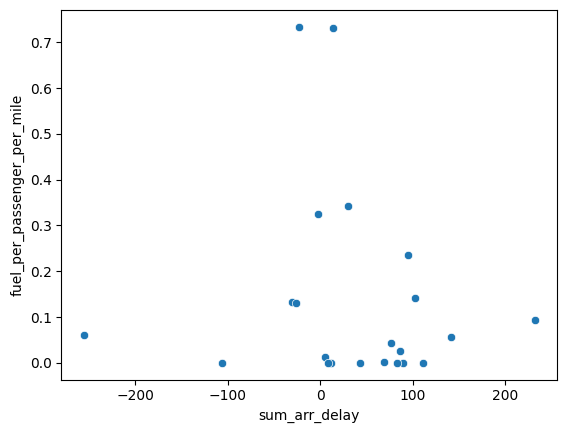

In [56]:
sns.scatterplot(data=flights_passengers_fuel,x='sum_arr_delay',y='fuel_per_passenger_per_mile')

# *Silvia's EDA*

In [57]:
# Look at fuel consumption data
fuel.loc[:,fuel.columns.str.contains('gallons')]
# fuel

,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,sint_gallons,ts_gallons,tdomt_gallons,tint_gallons,total_gallons
0,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,0.0,3000.0
1,0.0,0.0,0.0,0.0,0.0,0.0,163052.0,47060.0,210112.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,260848.0,0.0,0.0,0.0,0.0,260848.0,284362.0,0.0,284362.0
...,...,...,...,...,...,...,...,...,...
3030,0.0,0.0,0.0,0.0,0.0,0.0,632636.0,1899102.0,2531738.0
3031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3033,21048.0,0.0,0.0,0.0,0.0,21048.0,21048.0,0.0,21048.0


In [58]:
fuel.describe()

,month,airline_id,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,sint_gallons,ts_gallons,tdomt_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
count,3035.000000,3034.000000,3035.000000,3.034000e+03,3.034000e+03,3.034000e+03,3.033000e+03,3.034000e+03,3.034000e+03,3.032000e+03,...,3.035000e+03,3.034000e+03,3.034000e+03,3.034000e+03,3.034000e+03,3.035000e+03,3.035000e+03,3.034000e+03,3.035000e+03,3035.000000
mean,6.253707,20408.932432,2.004942,1.786446e+07,3.850826e+06,3.147425e+06,2.385017e+06,9.382481e+06,2.724694e+07,1.827054e+07,...,3.253424e+07,6.982969e+06,5.649611e+06,4.466445e+06,1.709902e+07,4.962763e+07,3.336389e+07,1.871540e+07,5.207313e+07,2016.839209
std,3.374584,530.127448,0.808436,4.340146e+07,1.404681e+07,9.696375e+06,8.090002e+06,3.016724e+07,7.006669e+07,4.356032e+07,...,8.107017e+07,2.630650e+07,1.786618e+07,1.523063e+07,5.632559e+07,1.306560e+08,8.140905e+07,5.660487e+07,1.310270e+08,1.368197
min,1.000000,19393.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,3.000000,20108.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.004500e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.377500e+03,0.000000e+00,1.335935e+05,2016.000000
50%,6.000000,20368.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.290630e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.705760e+05,3.026640e+05,1.229806e+06,2017.000000
75%,9.000000,20436.000000,3.000000,8.256753e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.056932e+06,1.350685e+07,1.107229e+07,...,1.522997e+07,0.000000e+00,0.000000e+00,0.000000e+00,2.018227e+06,2.163598e+07,1.850799e+07,4.117865e+06,2.549956e+07,2018.000000
max,12.000000,21974.000000,3.000000,2.062579e+08,8.813328e+07,5.928570e+07,5.501094e+07,1.689833e+08,3.499851e+08,2.073632e+08,...,5.321082e+08,2.321523e+08,1.636864e+08,1.208585e+08,4.883859e+08,1.020494e+09,5.383149e+08,4.942079e+08,1.032523e+09,2019.000000


In [59]:
# Function to plot multiple histograms
def plot_hist(df, columns=None):
    """
    Plot multiple histograms using the specified columns of a dataframe.
    Arguments:
    df: Dataframe.
    columns (optional): Columns of dataframe on which to create the histogram. If blank, all numeric data will be plotted.
    
    Make sure to `import seaborn as sns`.
    """
    if columns == None:
        columns = df.dtypes[df.dtypes != 'object'].index.tolist()
    fig, ax = plt.subplots(nrows=round((len(columns)+.5)/2), ncols=2, figsize=(10,18))
    for i, feature in enumerate(columns):
        sns.histplot(data=df,x=feature,ax=ax[i//2, i % 2])
    plt.tight_layout()
    # return df.describe()

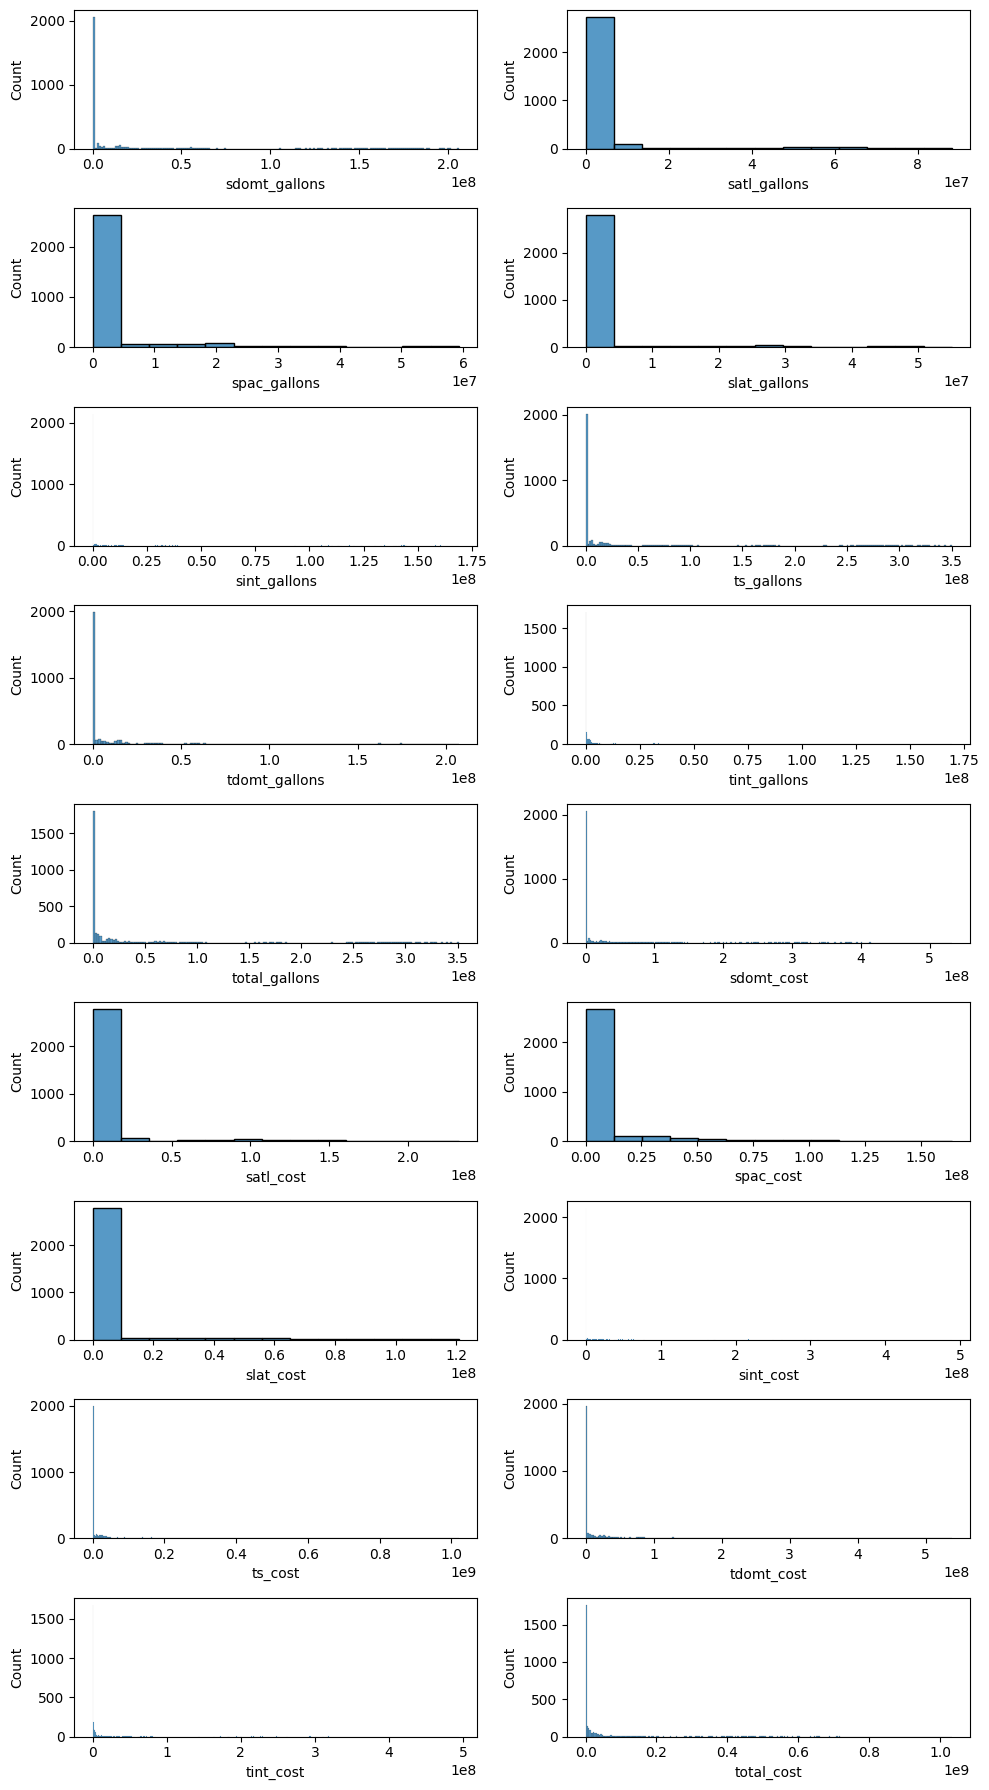

In [60]:
plot_hist(fuel.filter(regex=r'gallons|cost'))

In [61]:
# Function to plot multiple histograms using Plotly.
def plot_int_hist(df, columns=None):
    """
    Use Plotly to plot multiple histograms using the specified columns of a dataframe.
    Arguments:
    df: Dataframe.
    columns (optional): Columns of dataframe on which to create the histogram. If blank, all numeric data will be plotted.
    
    Make sure to do the following imports:
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    """
    if columns == None:
        columns = df.dtypes[df.dtypes != 'object'].index.tolist()
    fig = make_subplots(rows=round((len(columns)+.5)/2), cols=2,subplot_titles=columns)
    for i, feature in enumerate(columns):
        fig.add_trace(go.Histogram(x=df[feature]), 
        row=i//2+1, col=i % 2 + 1)
    fig.update_layout(height=300*round((len(columns)+.5)/2), showlegend=False)
    fig.show()
    
        

In [62]:
# Look at distribution of fuel data
plot_int_hist(fuel.filter(regex=r'gallons|cost'))

In [63]:
plot_int_hist(passengers.loc[:,'departures_scheduled':'seats'])

In [64]:
explore(passengers,id='unique_carrier',print_n_unique=False)

Unique IDs: 281. # of rows: 10000. Match: False



,Total,Percent
departures_scheduled,0,0.0
dest_country,0,0.0
origin_city_name,0,0.0
origin_country,0,0.0
origin_country_name,0,0.0
dest_airport_id,0,0.0
dest_city_market_id,0,0.0
dest,0,0.0
dest_city_name,0,0.0
dest_country_name,0,0.0


In [65]:
explore(fuel,id='unique_carrier',print_n_unique=True)

Unique IDs: 63. # of rows: 3035. Match: False
12 	 month
62 	 airline_id
62 	 unique_carrier
65 	 carrier
69 	 carrier_name
3 	 carrier_group_new
1427 	 sdomt_gallons
406 	 satl_gallons
456 	 spac_gallons
736 	 slat_gallons
898 	 sint_gallons
1493 	 ts_gallons
2282 	 tdomt_gallons
1869 	 tint_gallons
2401 	 total_gallons
1417 	 sdomt_cost
406 	 satl_cost
456 	 spac_cost
735 	 slat_cost
899 	 sint_cost
1483 	 ts_cost
2275 	 tdomt_cost
1869 	 tint_cost
2395 	 total_cost
5 	 year



,Total,Percent
total_gallons,6,0.001977
tdomt_gallons,3,0.000988
slat_gallons,2,0.000659
slat_cost,1,0.000329
spac_cost,1,0.000329
satl_cost,1,0.000329
tint_gallons,1,0.000329
airline_id,1,0.000329
ts_gallons,1,0.000329
sint_gallons,1,0.000329


In [66]:
# Look at rows with total_gallons = 0 (aggregate for each unique_carrier)
filter_no_fuel_data = (fuel['total_gallons']==0) | (fuel['total_gallons'].isnull())
fuel[filter_no_fuel_data].groupby('unique_carrier').agg('sum').filter(regex='gallons|cost')

C:\Users\silvh\AppData\Local\Temp\ipykernel_6048\2840241036.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,sint_gallons,ts_gallons,tdomt_gallons,tint_gallons,total_gallons,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost
unique_carrier,,,,,,,,,,,,,,,,,,
0WQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3EQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
flights_outliers_removed.sort_values('fl_date', ascending=False)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,fl_date_standard,fl_date_year,fl_date_month
7370,2019-12-31,AA,AA_CODESHARE,AA,4461,YX,N123HQ,4461,11057,CLT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-31,2019,12
7148,2019-12-31,AA,AA,AA,1908,AA,N192AN,1908,12889,LAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-31,2019,12
7390,2019-12-31,UA,UA_CODESHARE,UA,5528,OO,N143SY,5528,11292,DEN,...,16.0,0.0,0.0,NaN,NaN,NaN,NaN,2019-12-31,2019,12
1556,2019-12-31,F9,F9,F9,901,F9,N318FR,901,10257,ALB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-31,2019,12
2224,2019-12-31,DL,DL_CODESHARE,DL,5881,YX,N215JQ,5881,10721,BOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-31,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4599,2018-01-01,B6,B6,B6,1,B6,N954JB,1,12478,JFK,...,42.0,0.0,17.0,NaN,NaN,NaN,NaN,2018-01-01,2018,1
4854,2018-01-01,AS,AS,AS,27,AS,N307AS,27,13930,ORD,...,NaN,NaN,NaN,621.0,17.0,17.0,NaN,2018-01-01,2018,1
302,2018-01-01,WN,WN,WN,1990,WN,N7822A,1990,12892,LAX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,2018,1
667,2018-01-01,UA,UA,UA,414,UA,N461UA,414,11618,EWR,...,0.0,0.0,75.0,NaN,NaN,NaN,NaN,2018-01-01,2018,1
